# Linear Regression

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 $$

where the hypothesis $h_\theta$ is given by the linear model

$$ h_\theta = \theta^T x = \theta_0 + \theta_1 x_1 $$

Recall that the parameters of your model are the $\theta_j$ values. These are the values you will adjust to minimize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update

$\theta_j := \theta_j - \frac{\alpha}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$)

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

data = np.loadtxt('C:\\Users\\pochetti\Machine_Learning\\mlclass-ex1-005\\mlclass-ex1\ex1data1.txt', delimiter=',')
X = data[:,0]
y = data[:,1]

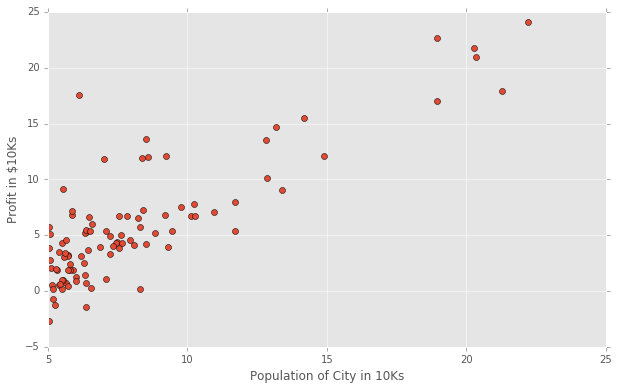

In [178]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(X, y, 'o', label='Raw Data')
plt.ylabel('Profit in $10Ks')
plt.xlabel('Population of City in 10Ks')
plt.show()

### Functions 

In [138]:
def computeCost(X, y, theta):
    # X = (97, 2); theta = (2,1)
    # X * theta = (97, 1)
    # (X * theta)' = (1, 97)
    residual = np.dot(X, theta) - y
    m = y.shape[0]
    return 1/(2*m) * np.dot(residual.transpose(), residual) 

def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros((num_iters, 1))
    for iter in range(num_iters):
        residual = np.dot(X, theta) - y
        temp = theta - (alpha/m) * np.dot(X.transpose(), residual)
        theta = temp
        #temp0 = theta(0) - (alpha/m)*sum((X*theta-y).*X(:,0));
        #temp1 = theta(1) - (alpha/m)*sum((X*theta-y).*X(:,1));
        #theta(0) = temp0;
        #theta(1) = temp1;

        # Save the cost J in every iteration    
        J_history[iter,0] = computeCost(X, y, theta)
    return theta, J_history

### Running Linear Model

In [169]:
data = np.loadtxt('C:\\Users\\pochetti\Machine_Learning\\mlclass-ex1-005\\mlclass-ex1\ex1data1.txt', delimiter=',')
X = data[:,0]
y = data[:,1]
y = y.reshape(y.shape[0], 1)
X = np.c_[X, np.ones(X.shape[0])] # adding column of zeros to X to account for theta_0 (the intercept)

In [170]:
theta = np.zeros((2, 1))
computeCost(X, y, theta) # cost at the very beginning with coefficients initialized at zero 

array([[ 32.07273388]])

In [171]:
iterations = 1500
alpha = 0.01

optimal_theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
print("Theta found by gradient descent: slope={0}, intercept={1}".format(optimal_theta[0],optimal_theta[1]))

Theta found by gradient descent: slope=[ 1.16636235], intercept=[-3.63029144]


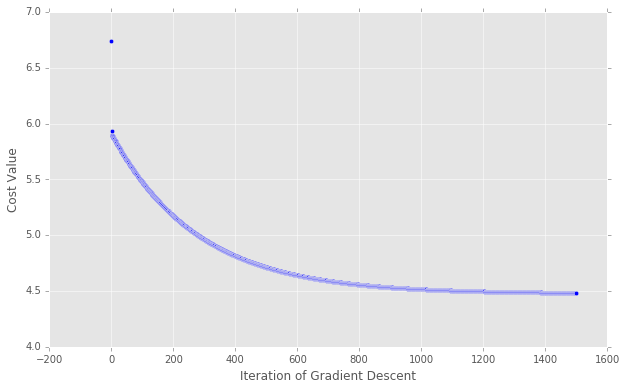

In [172]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(range(iterations), J_history)
plt.ylabel('Cost Value')
plt.xlabel('Iteration of Gradient Descent')
plt.show()

### Plotting Results

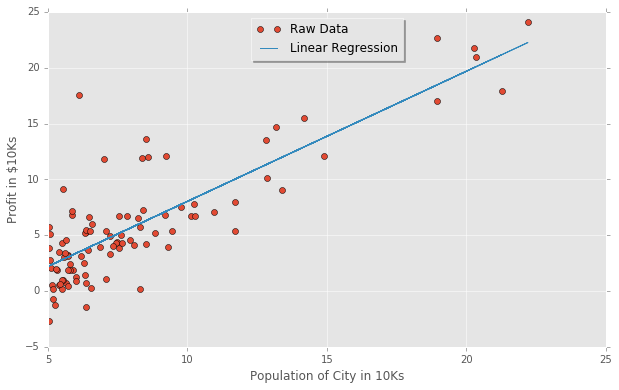

In [175]:
fig, ax = plt.subplots()
ax.plot(X[:,0], y[:,0], 'o', label='Raw Data')
ax.plot(X[:,0], np.dot(X, optimal_theta), linestyle='-', label='Linear Regression')
plt.ylabel('Profit in $10Ks')
plt.xlabel('Population of City in 10Ks')
legend = ax.legend(loc='upper center', shadow=True)
plt.show()